<a id='Top'></a>

# WSIPRE - <u>W</u>hole-<u>S</u>lide <u>I</u>mage <u>PRE</u>processing<a class='tocSkip'></a>

## Generating figures for docs<a class='tocSkip'></a>

In [1]:
from matplotlib import pyplot as plt
from wsipre import slide, show

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-displaying-WSIs" data-toc-modified-id="Loading-and-displaying-WSIs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and displaying WSIs</a></span></li><li><span><a href="#Locating-tissue-in-WSI" data-toc-modified-id="Locating-tissue-in-WSI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Locating tissue in WSI</a></span></li><li><span><a href="#Sampling-patches-from-normal-tissue" data-toc-modified-id="Sampling-patches-from-normal-tissue-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sampling patches from normal tissue</a></span></li><li><span><a href="#Sampling-patches-from-tumor-regions" data-toc-modified-id="Sampling-patches-from-tumor-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sampling patches from tumor regions</a></span></li></ul></div>

# Loading and displaying WSIs

In [2]:
wsi_files = ('patient_012_node_0.tif',
             'patient_012_node_0.xml')

In [3]:
white = (1, 1, 1)
black = (0, 0, 0)
red = (1, 0, 0)
yellow = (1, 1, 0)

In [5]:
xml_annotation_style = 'asap'
slide_file, annotation_file = wsi_files

wsi = slide.Slide(filename=slide_file,
                  annotation_filename=annotation_file,
                  xml_style=xml_annotation_style)

In [6]:
thumbnail, mask, downsampling_factor = wsi.get_thumbnail_with_annotation(
    size=(3000, 3000), polygon_type='line', line_thickness=8)

In [7]:
colors = {0: black, 1: black, 2: red}

fig = show.Figure(image=thumbnail, annotation=mask, color_map=colors)

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)

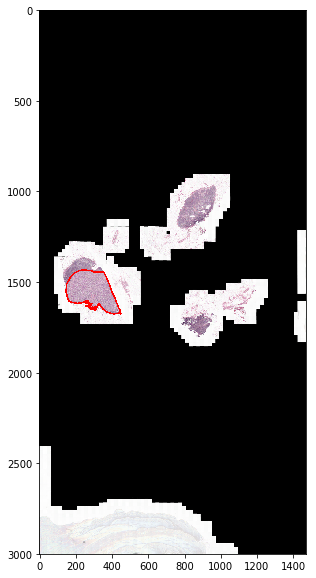

In [9]:
fig.show_image_with_annotation(split=False)

In [10]:
plt.rcParams['figure.figsize'] = (5, 5)

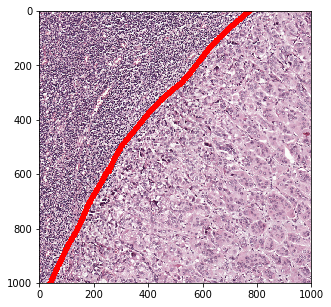

In [11]:
loc = (int(150*downsampling_factor), int(1450*downsampling_factor))

slide_region, mask_region = wsi.read_region_with_annotation(
    location=loc, level=2, size=(1000, 1000), polygon_type='line', line_thickness=20)

fig = show.Figure(image=slide_region, annotation=mask_region, color_map=colors)

fig.show_image_with_annotation(split=False)

# Locating tissue in WSI

In [12]:
wsi.get_tissue_mask(polygon_type='line', line_thickness=15)

Slide('/home/luis/Desktop/slides/patient_012_node_0.tif')

In [13]:
fig = show.Figure(wsi.downsampled_slide, wsi.tissue_mask, {0: black, 1: yellow})

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)

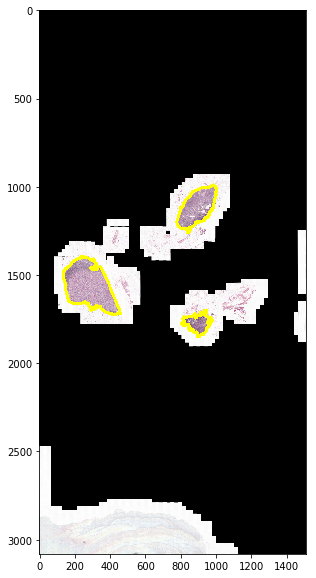

In [15]:
fig.show_image_with_annotation(split=False)

# Sampling patches from normal tissue

In [16]:
plt.rcParams['figure.figsize'] = (10, 10)

In [17]:
wsi.label_map

{'metastases': 2, 'normal': 1}

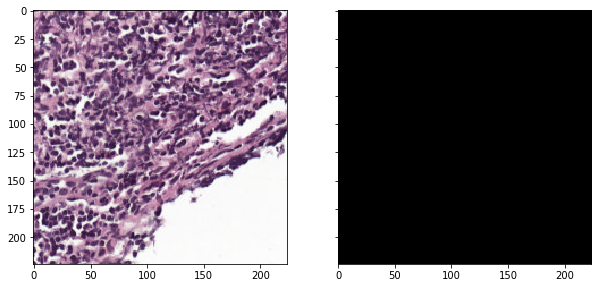

In [18]:
tissue_patch, mask_region = wsi.read_random_tissue_patch(
    level=2, size=(224, 224), avoid_labels=[2])

fig = show.Figure(image=tissue_patch, annotation=mask_region, color_map=colors)

fig.show_image_with_annotation(split=True)

# Sampling patches from tumor regions

In [24]:
plt.rcParams['figure.figsize'] = (10, 10)

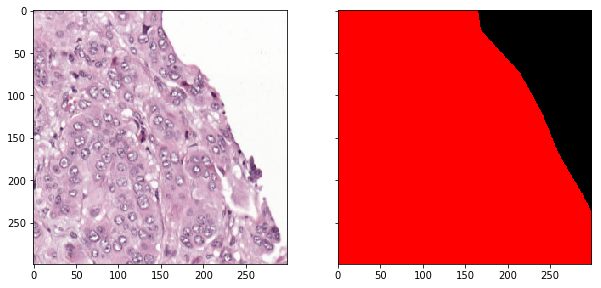

In [25]:
slide_region, mask_region = wsi.read_random_patch(
    level=2, size=(299, 299), target_class=2,
    min_class_area_ratio=0.75,
    polygon_type='area')

fig = show.Figure(slide_region, mask_region, {0: black, 2:red})

fig.show_image_with_annotation(split=True)

In [26]:
plt.rcParams['figure.figsize'] = (3, 3)

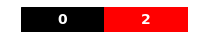

In [27]:
fig.show_label_colors()

[Top of the page](#Top)